In [10]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Track data loading
import psutil
import time

# Save&Load results
import pickle
import os

In [2]:
import networkx as nx

import pandas as pd
import seaborn as sns

# 1. Load Data

In [22]:
def print_graph_info(G, returnBool = False):

    nodeNum = G.number_of_nodes()
    edgeNum = G.number_of_edges()
    weightSum = G.size(weight="weight")
    
    print("Graph Type: ", type(G))
    print("Node Num: ", nodeNum)
    print("Edge Num: ", edgeNum)
    print("Weight Sum: ", weightSum)
    
    if returnBool:
        return nodeNum, edgeNum, weightSum

In [3]:
st = time.time()

with open("Graphs/G_filtered.gpickle", 'rb') as f:
    G_filtered = pickle.load(f)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Execution time: 1.4952151735623678 mins
RAM memory % used: 6.0
RAM Used (GB): 21.604798464


In [23]:
Gf_nodeNum, Gf_edgeNum, Gf_weightSum = print_graph_info(G_filtered, returnBool = True)

Graph Type:  <class 'networkx.classes.digraph.DiGraph'>
Node Num:  767553
Edge Num:  2165564
Weight Sum:  29991328.0


## 1.1. Subgraphs of different phases

Extract retweets during some specific period, and construct the corresponding retweet subgraph.

In [6]:
def get_temporal_subgraph(G, latest_start, earliest_end):
    
    subG = nx.DiGraph()
    
    node_timeStamps_dict = nx.get_node_attributes(G, "timeStamps")
    edge_timeStamps_dict = nx.get_edge_attributes(G, "timeStamps")
    
    for k,v in node_timeStamps_dict.items():
        index_mask = np.logical_and(v >= latest_start, v <= earliest_end)
        if np.sum(index_mask) > 0:
            subG.add_node(k, timeStamps = G.nodes[k]['timeStamps'][index_mask], 
                             followers = G.nodes[k]['followers'][index_mask],
                             friends = G.nodes[k]['friends'][index_mask],
                             bot = G.nodes[k]['bot'][index_mask],
                             verified = G.nodes[k]['verified'][index_mask])
            
    for k,v in edge_timeStamps_dict.items():
        index_mask = np.logical_and(v >= latest_start, v <= earliest_end)
        if np.sum(index_mask) > 0:
            subG.add_edge(k[0], k[1], weight = np.sum(index_mask),
                                      timeStamps = G.edges[k]['timeStamps'][index_mask], 
                                      newsCategories = G.edges[k]['newsCategories'][index_mask],
                                      newsCategoriesGeneralised = G.edges[k]['newsCategoriesGeneralised'][index_mask])
    
    return subG

In [7]:
from datetime import datetime

def cal_timestamps(date):
    
    start_timestamp = 1584482894
    
    # Define the start and end dates
    start_date = datetime.strptime('2020-03-17', '%Y-%m-%d')
    end_date = datetime.strptime(date, '%Y-%m-%d')

    # Calculate the difference in days
    difference_in_days = (end_date - start_date).days
    
    return start_timestamp + difference_in_days*24*60*60

### 1.1.1.  6 months: 2020-09-17 to 2021-03-17

In [8]:
latest_start = cal_timestamps("2020-09-17")
earliest_end = cal_timestamps("2021-03-17")

In [11]:
st = time.time()

G_filtered_sub1 = get_temporal_subgraph(G_filtered, latest_start, earliest_end)
file_address = "Graphs/G_filtered_sub1.gpickle"

if os.path.isfile(file_address):
    print("Graph already saved.")
else: 
    print("Saving graph")
    nx.write_gpickle(G_filtered_sub1, file_address)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Graph already saved.
Execution time: 0.9167633930842082 mins
RAM memory % used: 7.0
RAM Used (GB): 25.568313344


In [24]:
Gf1_nodeNum, Gf1_edgeNum, Gf1_weightSum = print_graph_info(G_filtered_sub1, returnBool = True)

Graph Type:  <class 'networkx.classes.digraph.DiGraph'>
Node Num:  618764
Edge Num:  1372398
Weight Sum:  7358104.0


In [42]:
# Comparing with the filtered network
nodePercent = Gf1_nodeNum / Gf_nodeNum
weightPercent = Gf1_weightSum / Gf_weightSum

print('Node percent:', nodePercent)
print('Weight percent:', weightPercent)

Node percent: 0.8061514970301725
Weight percent: 0.2453410532537939


In [13]:
G_filtered_sub1.nodes[26]

{'timeStamps': array([1600453630, 1600469407, 1600984116, 1601605170, 1601605195,
        1601625207, 1601692181, 1601692997, 1601770209, 1601774289,
        1601782251, 1601783575, 1601856716, 1601859700, 1601926128,
        1601934823, 1602006166, 1602013261, 1602026377, 1602026855,
        1602115715, 1602133695, 1602177702, 1602189044, 1602279503,
        1602288687, 1602295581, 1602360218, 1602470139, 1602523382,
        1602563533, 1602613851, 1602726072, 1602991875, 1602992048,
        1602992428, 1603047387, 1603134001, 1603231044, 1603343138,
        1603478113, 1603517855, 1603603459, 1603734606, 1603752687,
        1603835778, 1603931378, 1603999602, 1604171899, 1604172375,
        1604729964, 1604788122, 1604900047, 1605413384, 1605672432,
        1606289507, 1606521767, 1607032140, 1607063024, 1607670568,
        1607836752, 1607839129, 1607895469, 1607905374, 1607906033,
        1607973754, 1608190572, 1608231168, 1608355516, 1608877286,
        1610940635, 1612057318, 16

In [14]:
G_filtered_sub1.edges[(26, 10628236)]

{'weight': 3,
 'timeStamps': array([1601605170, 1605672432, 1612057318]),
 'newsCategories': array([3, 9, 3]),
 'newsCategoriesGeneralised': array([0, 2, 0])}

### 1.1.2. 6 months: 2021-11-17 to 2022-05-17

In [17]:
latest_start = cal_timestamps("2021-11-17")
earliest_end = cal_timestamps("2022-05-17")

In [18]:
st = time.time()

G_filtered_sub2 = get_temporal_subgraph(G_filtered, latest_start, earliest_end)

file_address = "Graphs/G_filtered_sub2.gpickle"

if os.path.isfile(file_address):
    print("Graph already saved.")
else: 
    print("Saving graph")
    nx.write_gpickle(G_filtered_sub2, file_address)

et = time.time()
elapsed_time = et - st

print('Execution time:', elapsed_time/60, 'mins')
# Getting % usage of virtual_memory ( 3rd field)
print('RAM memory % used:', psutil.virtual_memory()[2])
# Getting usage of virtual_memory in GB ( 4th field)
print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)

Graph already saved.
Execution time: 0.7143027623494466 mins
RAM memory % used: 7.0
RAM Used (GB): 25.545875456


In [27]:
Gf2_nodeNum, Gf2_edgeNum, Gf2_weightSum = print_graph_info(G_filtered_sub2, returnBool = True)

Graph Type:  <class 'networkx.classes.digraph.DiGraph'>
Node Num:  446558
Edge Num:  755008
Weight Sum:  3207267.0


In [41]:
# Comparing with the filtered network
nodePercent = Gf2_nodeNum / Gf_nodeNum
weightPercent = Gf2_weightSum / Gf_weightSum

print('Node percent:', nodePercent)
print('Weight percent:', weightPercent)

Node percent: 0.5817943516604065
Weight percent: 0.10693981273520133


### 1.1.3. Comparison

In [79]:
def Intersection(lst1, lst2):
    return list(set(lst1).intersection(lst2))

In [81]:
def Union(lst1, lst2):
    return set(lst1 + lst2)

In [82]:
user_intersect = Intersection(list(G_filtered_sub1.nodes()), list(G_filtered_sub2.nodes()))
user_union = Union(list(G_filtered_sub1.nodes()), list(G_filtered_sub2.nodes()))

In [84]:
len(user_intersect) / len(user_union)

0.5411752792083792

## 1.2. Users extreme

In [43]:
save_address = "Results/User_categories/Users_extreme.pkl"
with open(save_address, 'rb') as f: 
    scientificNodes_extreme, fakeNodes_extreme, uncertainNodes_extreme = pickle.load(f)

# 2. Bow-tie Decomposition

In [44]:
def get_subgraph_ofCategorisedRetweets(G, edge_stance, verbose = False):
    
    subG = nx.DiGraph()
    
    newsCategoriesGeneralised_dict = nx.get_edge_attributes(G, 'newsCategoriesGeneralised')
    
    for edge in list(G.edges):
        bool_arr = (newsCategoriesGeneralised_dict[edge] == edge_stance)
        if np.sum(bool_arr) > 0:
            subG.add_edge(edge[0], edge[1], weight = np.sum(bool_arr))
            
    if verbose:
        summary_info = [subG.number_of_nodes(), subG.number_of_edges(), subG.size(weight = "weight")]
        print(f"Node numbers: {summary_info[0]}; Edge numbers: {summary_info[1]}; Weight numbers: {summary_info[2]}")
    
    return subG

In [45]:
def get_bowtie_components(G, verbose = False):
    GT = nx.reverse(G, copy=True)   # All edge directions are reversed
    
    strongly_con_comp = list(nx.strongly_connected_components(G))
    strongly_con_comp = max(strongly_con_comp, key=len)
    
    S = strongly_con_comp   # list of SCC
    
    v_any = list(S)[0]   # an arbitrary node in SCC 
    DFS_G = set(nx.dfs_tree(G,v_any).nodes())   # the set of nodes that v_any can reach (depth-first-search)
    DFS_GT = set(nx.dfs_tree(GT,v_any).nodes()) # the set of nodes that can reach v_any (depth-first-search)
    OUT = DFS_G - S
    IN = DFS_GT - S
    V_rest = set(G.nodes()) - S - OUT - IN
    
    
    TUBES = set()
    INTENDRILS = set()
    OUTTENDRILS = set()
    OTHER = set()
    
    for v in V_rest:
        irv = len(IN & set(nx.dfs_tree(GT,v).nodes())) != 0
        vro = len(OUT & set(nx.dfs_tree(G,v).nodes())) != 0
        if irv and vro:
            TUBES.add(v)
        elif irv and not vro:
            INTENDRILS.add(v)
        elif not irv and vro:
            OUTTENDRILS.add(v)
        elif not irv and not vro:
            OTHER.add(v)
    
    bt_partition_list = [list(S), list(IN), list(OUT), list(TUBES), list(INTENDRILS), list(OUTTENDRILS), list(OTHER)]
            
    if verbose:
        all_nodes_num = G.number_of_nodes()
        bt_names_list = ['S', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
        for i in range(7):
            print(bt_names_list[i], end = "  ")
            print("Number:", len(bt_partition_list[i]), end = "  ")
            print("Percentage: {:.2f}%".format(len(bt_partition_list[i])/all_nodes_num * 100))
    
    return bt_partition_list

In [46]:
def get_weightCount_between_twoListOfNodes(G, l1, l2):
    
    l1_outEdges = list(G.out_edges(l1))
    l2_inEdges = list(G.in_edges(l2))

    # Finding intersection
    intersect = list(set(l1_outEdges) & set(l2_inEdges))
    weight_arr = np.array([G.edges[edge]["weight"] for edge in intersect])
    
    return np.sum(weight_arr)

In [47]:
def get_weightCount_acrossAllBTPartition(G, bt_list, verbose = False):
    
    all_weight_count = G.size(weight = "weight")
    bt_names_list = ['S', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    weightCount_matrix = np.zeros((7,7), dtype = int)
    weightPercent_matrix = np.zeros((7,7))
    
    for i in range(7):
        for j in range(7):
            weightCount = get_weightCount_between_twoListOfNodes(G, bt_list[i], bt_list[j])
            weightCount_matrix[i, j] = weightCount
            
            weightPercent = weightCount/all_weight_count
            weightPercent_matrix[i, j] = weightPercent
            
    if verbose:
        print("Weight count: ")
        print(weightCount_matrix)
        print("Weight percentage: ")
        print(np.round(weightPercent_matrix * 100, 2))
    
    return weightPercent_matrix

In [48]:
def get_all_BTResults_ofCategorisedRetweets(G, edge_stance, verbose = True):
    subG = get_subgraph_ofCategorisedRetweets(G, edge_stance, verbose = verbose)
    print("===========")
    bt_list = get_bowtie_components(subG, verbose = verbose)
    print("===========")
    weightPercent_matrix = get_weightCount_acrossAllBTPartition(subG, bt_list, verbose = verbose)
    
    return bt_list, weightPercent_matrix

In [49]:
colour_palette = {"scientific":"#2a9d8f", "fake":"#e76f51", "uncertain":"#e9c46a"}

In [50]:
from matplotlib.colors import LogNorm

def plot_weightPercent_matrix(weightPercent_matrix, color, save = None):
    fig, axs = plt.subplots(figsize = (6,5), constrained_layout = True)
    
    ax = sns.heatmap(weightPercent_matrix*100, annot=True, fmt=".2f", cmap = sns.light_palette(color, as_cmap=True), norm = LogNorm(), annot_kws={'size': 12}, cbar_kws={'label': 'Percentage of retweets (%)'})
    ax.collections[0].set_clim(np.min((weightPercent_matrix*100)[weightPercent_matrix>0]),np.max(weightPercent_matrix*100)) 
    ax.figure.axes[-1].yaxis.label.set_size(15)
    ax.figure.axes[-1].tick_params(labelsize = 15)

    ax.set_xticklabels(['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS'], rotation = 45, fontsize = 12)
    ax.set_yticklabels(['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS'], rotation = 45, fontsize = 12)
    
    if save:
        fig.savefig(save, dpi=400)

## 2.1. Entire timeframe

In [51]:
scientific_bt_list, scientific_weightPercent_matrix = get_all_BTResults_ofCategorisedRetweets(G_filtered, edge_stance = 0)

Node numbers: 514410; Edge numbers: 1396550; Weight numbers: 10762460.0
S  Number: 7191  Percentage: 1.40%
IN  Number: 171008  Percentage: 33.24%
OUT  Number: 10278  Percentage: 2.00%
TUBES  Number: 5022  Percentage: 0.98%
INTENDRILS  Number: 23949  Percentage: 4.66%
OUTTENDRILS  Number: 230126  Percentage: 44.74%
OTHERS  Number: 66836  Percentage: 12.99%
Weight count: 
[[ 348362       0  274858       0       0       0       0]
 [2309355  231689 4061215   56942  251275       0       0]
 [      0       0  113338       0       0       0       0]
 [      0       0   63253   15456    6214       0       0]
 [      0       0       0       0   35870       0       0]
 [      0       0 2471272   41711   92686   35917   25049]
 [      0       0       0       0  174541       0  153457]]
Weight percentage: 
[[ 3.24  0.    2.55  0.    0.    0.    0.  ]
 [21.46  2.15 37.74  0.53  2.33  0.    0.  ]
 [ 0.    0.    1.05  0.    0.    0.    0.  ]
 [ 0.    0.    0.59  0.14  0.06  0.    0.  ]
 [ 0.    0.  

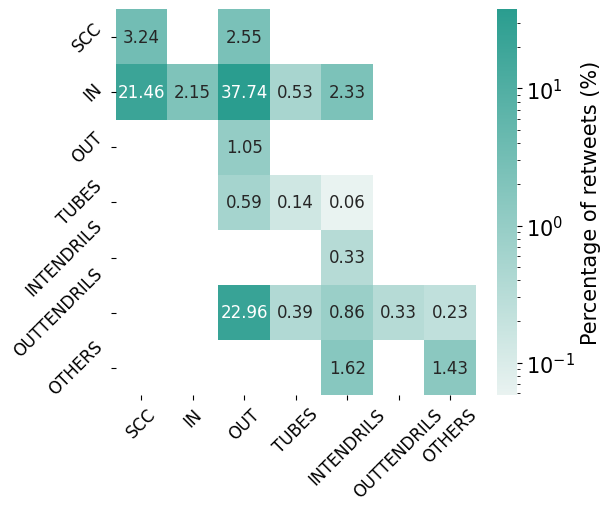

In [52]:
plot_weightPercent_matrix(scientific_weightPercent_matrix, color = colour_palette["scientific"], save = "Figures/Fig4a")

In [53]:
fake_bt_list, fake_weightPercent_matrix = get_all_BTResults_ofCategorisedRetweets(G_filtered, edge_stance = 1)

Node numbers: 237238; Edge numbers: 544077; Weight numbers: 2367410.0
S  Number: 1792  Percentage: 0.76%
IN  Number: 49687  Percentage: 20.94%
OUT  Number: 2386  Percentage: 1.01%
TUBES  Number: 2007  Percentage: 0.85%
INTENDRILS  Number: 6549  Percentage: 2.76%
OUTTENDRILS  Number: 125388  Percentage: 52.85%
OTHERS  Number: 49429  Percentage: 20.84%
Weight count: 
[[ 50404      0  28894      0      0      0      0]
 [302854  56081 631924  16883  48107      0      0]
 [     0      0  22179      0      0      0      0]
 [     0      0  19163   6764   1158      0      0]
 [     0      0      0      0  11469      0      0]
 [     0      0 807734  12803  32939  17579   9184]
 [     0      0      0      0 241256      0  50035]]
Weight percentage: 
[[ 2.13  0.    1.22  0.    0.    0.    0.  ]
 [12.79  2.37 26.69  0.71  2.03  0.    0.  ]
 [ 0.    0.    0.94  0.    0.    0.    0.  ]
 [ 0.    0.    0.81  0.29  0.05  0.    0.  ]
 [ 0.    0.    0.    0.    0.48  0.    0.  ]
 [ 0.    0.   34.12  0

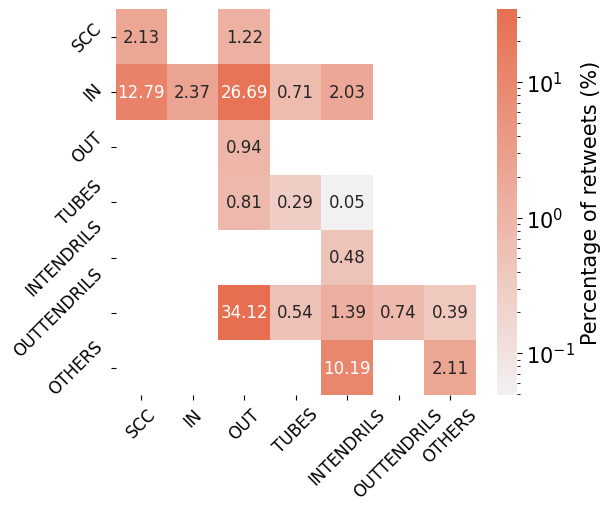

In [54]:
plot_weightPercent_matrix(fake_weightPercent_matrix, color = colour_palette["fake"], save = "Figures/Fig4b")

In [55]:
uncertain_bt_list, uncertain_weightPercent_matrix = get_all_BTResults_ofCategorisedRetweets(G_filtered, edge_stance = 2)

Node numbers: 674234; Edge numbers: 1804286; Weight numbers: 16861458.0
S  Number: 8459  Percentage: 1.25%
IN  Number: 195323  Percentage: 28.97%
OUT  Number: 13849  Percentage: 2.05%
TUBES  Number: 6264  Percentage: 0.93%
INTENDRILS  Number: 32451  Percentage: 4.81%
OUTTENDRILS  Number: 296113  Percentage: 43.92%
OTHERS  Number: 121775  Percentage: 18.06%
Weight count: 
[[ 434594       0  328947       0       0       0       0]
 [2942830  340563 5160930   89810  651250       0       0]
 [      0       0  261347       0       0       0       0]
 [      0       0  128914   67380   18172       0       0]
 [      0       0       0       0  267585       0       0]
 [      0       0 4056314   93852  360561   79161   93897]
 [      0       0       0       0  685101       0  800250]]
Weight percentage: 
[[ 2.58  0.    1.95  0.    0.    0.    0.  ]
 [17.45  2.02 30.61  0.53  3.86  0.    0.  ]
 [ 0.    0.    1.55  0.    0.    0.    0.  ]
 [ 0.    0.    0.76  0.4   0.11  0.    0.  ]
 [ 0.    0. 

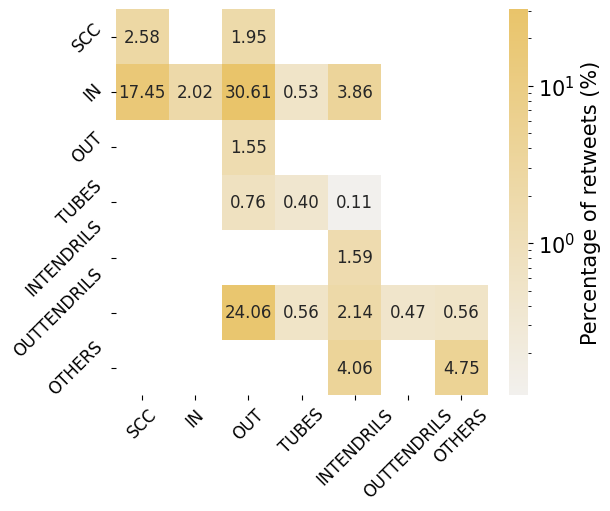

In [56]:
plot_weightPercent_matrix(uncertain_weightPercent_matrix, color = colour_palette["uncertain"], save = "Figures/Fig4c")

- Extreme nodes

In [66]:
def get_node_bowtie_role(bt_list, nodes, verbose = True):
    
    bt_values_list = ['S', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    results = []
    for i in range(7):
        intersect = np.intersect1d(bt_list[i], nodes)
        results.append(intersect)
        
        if verbose:
            print(bt_values_list[i], end = "  ")
            print("Number:", len(intersect), end = "  ")
            print("Percentage: {:.2f}%".format(len(intersect)/len(bt_list[i]) * 100))
    
    return results

In [46]:
get_node_bowtie_role(scientific_bt_list, scientificNodes_extreme, verbose = True);

S  Number: 189  Percentage: 2.63%
IN  Number: 10890  Percentage: 6.37%
OUT  Number: 1406  Percentage: 13.68%
TUBES  Number: 254  Percentage: 5.06%
INTENDRILS  Number: 2153  Percentage: 8.99%
OUTTENDRILS  Number: 52005  Percentage: 22.60%
OTHERS  Number: 6151  Percentage: 9.20%


In [47]:
get_node_bowtie_role(fake_bt_list, fakeNodes_extreme, verbose = True);

S  Number: 1  Percentage: 0.06%
IN  Number: 301  Percentage: 0.61%
OUT  Number: 74  Percentage: 3.10%
TUBES  Number: 2  Percentage: 0.10%
INTENDRILS  Number: 195  Percentage: 2.98%
OUTTENDRILS  Number: 8760  Percentage: 6.99%
OTHERS  Number: 9703  Percentage: 19.63%


In [48]:
get_node_bowtie_role(uncertain_bt_list, uncertainNodes_extreme, verbose = True);

S  Number: 228  Percentage: 2.70%
IN  Number: 15362  Percentage: 7.86%
OUT  Number: 4106  Percentage: 29.65%
TUBES  Number: 665  Percentage: 10.62%
INTENDRILS  Number: 11308  Percentage: 34.85%
OUTTENDRILS  Number: 111051  Percentage: 37.50%
OTHERS  Number: 66086  Percentage: 54.27%


## 2.2. Temporal variations

### 2.2.1. 6 months: 2020-09-17 to 2021-03-17

In [59]:
scientific_bt_list1, scientific_weightPercent_matrix1 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub1, edge_stance = 0)

Node numbers: 299688; Edge numbers: 716909; Weight numbers: 2712349.0
S  Number: 2030  Percentage: 0.68%
IN  Number: 74715  Percentage: 24.93%
OUT  Number: 4471  Percentage: 1.49%
TUBES  Number: 3449  Percentage: 1.15%
INTENDRILS  Number: 14197  Percentage: 4.74%
OUTTENDRILS  Number: 146182  Percentage: 48.78%
OTHERS  Number: 54644  Percentage: 18.23%
Weight count: 
[[ 37324      0  39460      0      0      0      0]
 [371769  84810 937832  31140 106593      0      0]
 [     0      0  24107      0      0      0      0]
 [     0      0  21424   6347   3189      0      0]
 [     0      0      0      0  13702      0      0]
 [     0      0 777439  25806  55761  14235  12005]
 [     0      0      0      0  90186      0  59220]]
Weight percentage: 
[[ 1.38  0.    1.45  0.    0.    0.    0.  ]
 [13.71  3.13 34.58  1.15  3.93  0.    0.  ]
 [ 0.    0.    0.89  0.    0.    0.    0.  ]
 [ 0.    0.    0.79  0.23  0.12  0.    0.  ]
 [ 0.    0.    0.    0.    0.51  0.    0.  ]
 [ 0.    0.   28.66  

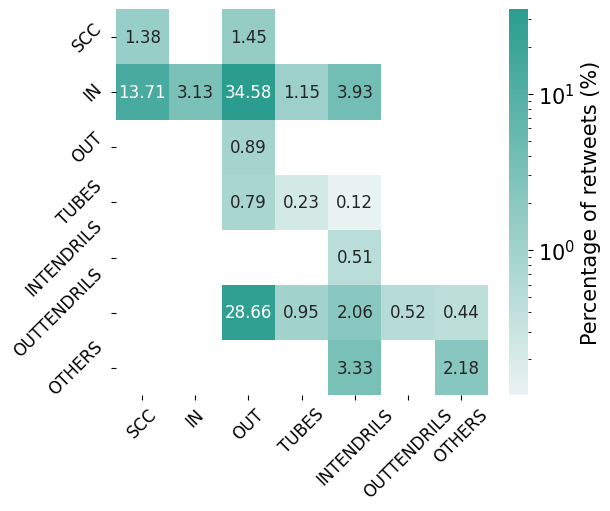

In [60]:
plot_weightPercent_matrix(scientific_weightPercent_matrix1, color = colour_palette["scientific"], save = "Figures/Fig4a1")

In [61]:
fake_bt_list1, fake_weightPercent_matrix1 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub1, edge_stance = 1)

Node numbers: 103648; Edge numbers: 184843; Weight numbers: 499134.0
S  Number: 136  Percentage: 0.13%
IN  Number: 4752  Percentage: 4.58%
OUT  Number: 640  Percentage: 0.62%
TUBES  Number: 640  Percentage: 0.62%
INTENDRILS  Number: 1510  Percentage: 1.46%
OUTTENDRILS  Number: 60607  Percentage: 58.47%
OTHERS  Number: 35363  Percentage: 34.12%
Weight count: 
[[  2677      0   1536      0      0      0      0]
 [ 17995   5691  31771   3174   5901      0      0]
 [     0      0   7028      0      0      0      0]
 [     0      0   3686   2139    542      0      0]
 [     0      0      0      0   2398      0      0]
 [     0      0 267371  16057  30720   8224   8407]
 [     0      0      0      0  54456      0  29361]]
Weight percentage: 
[[ 0.54  0.    0.31  0.    0.    0.    0.  ]
 [ 3.61  1.14  6.37  0.64  1.18  0.    0.  ]
 [ 0.    0.    1.41  0.    0.    0.    0.  ]
 [ 0.    0.    0.74  0.43  0.11  0.    0.  ]
 [ 0.    0.    0.    0.    0.48  0.    0.  ]
 [ 0.    0.   53.57  3.22  6.

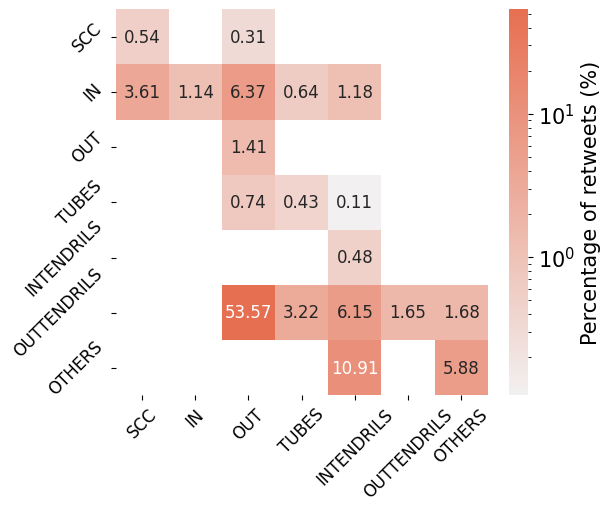

In [62]:
plot_weightPercent_matrix(fake_weightPercent_matrix1, color = colour_palette["fake"], save = "Figures/Fig4b1")

In [63]:
uncertain_bt_list1, uncertain_weightPercent_matrix1 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub1, edge_stance = 2)

Node numbers: 407788; Edge numbers: 944421; Weight numbers: 4146621.0
S  Number: 2046  Percentage: 0.50%
IN  Number: 65555  Percentage: 16.08%
OUT  Number: 6129  Percentage: 1.50%
TUBES  Number: 4159  Percentage: 1.02%
INTENDRILS  Number: 18485  Percentage: 4.53%
OUTTENDRILS  Number: 200162  Percentage: 49.08%
OTHERS  Number: 111252  Percentage: 27.28%
Weight count: 
[[  38591       0   44441       0       0       0       0]
 [ 317511   93234  931744   35839  199532       0       0]
 [      0       0   49971       0       0       0       0]
 [      0       0   38628   17518    9776       0       0]
 [      0       0       0       0   66914       0       0]
 [      0       0 1377745   39430  179568   35484   41247]
 [      0       0       0       0  346211       0  283237]]
Weight percentage: 
[[ 0.93  0.    1.07  0.    0.    0.    0.  ]
 [ 7.66  2.25 22.47  0.86  4.81  0.    0.  ]
 [ 0.    0.    1.21  0.    0.    0.    0.  ]
 [ 0.    0.    0.93  0.42  0.24  0.    0.  ]
 [ 0.    0.    0

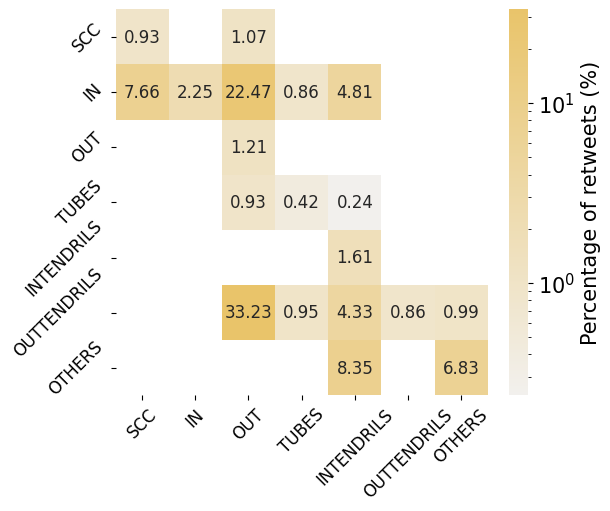

In [64]:
plot_weightPercent_matrix(uncertain_weightPercent_matrix1, color = colour_palette["uncertain"], save = "Figures/Fig4c1")

- Extreme Nodes

In [67]:
get_node_bowtie_role(scientific_bt_list1, scientificNodes_extreme, verbose = True);

S  Number: 76  Percentage: 3.74%
IN  Number: 5219  Percentage: 6.99%
OUT  Number: 795  Percentage: 17.78%
TUBES  Number: 223  Percentage: 6.47%
INTENDRILS  Number: 1446  Percentage: 10.19%
OUTTENDRILS  Number: 31634  Percentage: 21.64%
OTHERS  Number: 5931  Percentage: 10.85%


In [68]:
get_node_bowtie_role(fake_bt_list1, fakeNodes_extreme, verbose = True);

S  Number: 0  Percentage: 0.00%
IN  Number: 51  Percentage: 1.07%
OUT  Number: 34  Percentage: 5.31%
TUBES  Number: 1  Percentage: 0.16%
INTENDRILS  Number: 58  Percentage: 3.84%
OUTTENDRILS  Number: 3713  Percentage: 6.13%
OTHERS  Number: 3882  Percentage: 10.98%


In [69]:
get_node_bowtie_role(uncertain_bt_list1, uncertainNodes_extreme, verbose = True);

S  Number: 41  Percentage: 2.00%
IN  Number: 2585  Percentage: 3.94%
OUT  Number: 1857  Percentage: 30.30%
TUBES  Number: 322  Percentage: 7.74%
INTENDRILS  Number: 6468  Percentage: 34.99%
OUTTENDRILS  Number: 56119  Percentage: 28.04%
OTHERS  Number: 56303  Percentage: 50.61%


## 2.2.2. 6 months: 2021-11-17 to 2022-05-17

In [70]:
scientific_bt_list2, scientific_weightPercent_matrix2 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub2, edge_stance = 0)

Node numbers: 170449; Edge numbers: 366629; Weight numbers: 1089028.0
S  Number: 834  Percentage: 0.49%
IN  Number: 33329  Percentage: 19.55%
OUT  Number: 1911  Percentage: 1.12%
TUBES  Number: 1793  Percentage: 1.05%
INTENDRILS  Number: 9053  Percentage: 5.31%
OUTTENDRILS  Number: 71852  Percentage: 42.15%
OTHERS  Number: 51677  Percentage: 30.32%
Weight count: 
[[ 13778      0  12897      0      0      0      0]
 [ 79391  67755 168292  19924  80692      0      0]
 [     0      0  12260      0      0      0      0]
 [     0      0  10493   2360   2057      0      0]
 [     0      0      0      0   9167      0      0]
 [     0      0 414584  19218  40886   8132   7630]
 [     0      0      0      0  80969      0  38543]]
Weight percentage: 
[[ 1.27  0.    1.18  0.    0.    0.    0.  ]
 [ 7.29  6.22 15.45  1.83  7.41  0.    0.  ]
 [ 0.    0.    1.13  0.    0.    0.    0.  ]
 [ 0.    0.    0.96  0.22  0.19  0.    0.  ]
 [ 0.    0.    0.    0.    0.84  0.    0.  ]
 [ 0.    0.   38.07  1.7

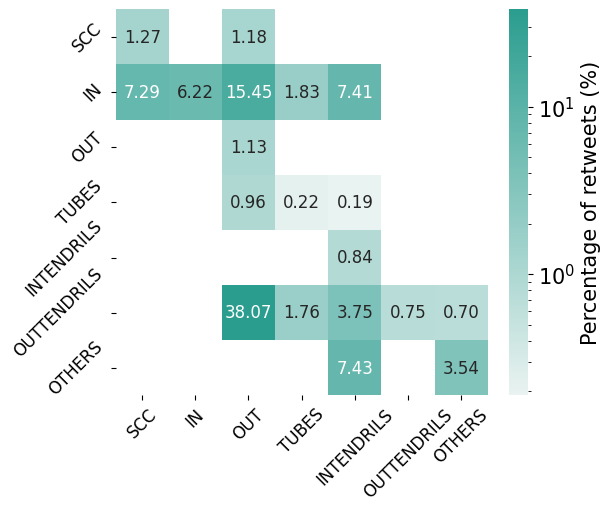

In [71]:
plot_weightPercent_matrix(scientific_weightPercent_matrix2, color = colour_palette["scientific"], save = "Figures/Fig4a2")

In [72]:
fake_bt_list2, fake_weightPercent_matrix2 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub2, edge_stance = 1)

Node numbers: 73532; Edge numbers: 124991; Weight numbers: 405880.0
S  Number: 72  Percentage: 0.10%
IN  Number: 964  Percentage: 1.31%
OUT  Number: 76  Percentage: 0.10%
TUBES  Number: 224  Percentage: 0.30%
INTENDRILS  Number: 691  Percentage: 0.94%
OUTTENDRILS  Number: 34075  Percentage: 46.34%
OTHERS  Number: 37430  Percentage: 50.90%
Weight count: 
[[  1718      0    182      0      0      0      0]
 [  9412    504   1733    486   2013      0      0]
 [     0      0    255      0      0      0      0]
 [     0      0   1056    897    625      0      0]
 [     0      0      0      0   2933      0      0]
 [     0      0 139690  18326  36345  10423  12876]
 [     0      0      0      0 127778      0  38628]]
Weight percentage: 
[[ 0.42  0.    0.04  0.    0.    0.    0.  ]
 [ 2.32  0.12  0.43  0.12  0.5   0.    0.  ]
 [ 0.    0.    0.06  0.    0.    0.    0.  ]
 [ 0.    0.    0.26  0.22  0.15  0.    0.  ]
 [ 0.    0.    0.    0.    0.72  0.    0.  ]
 [ 0.    0.   34.42  4.52  8.95  2

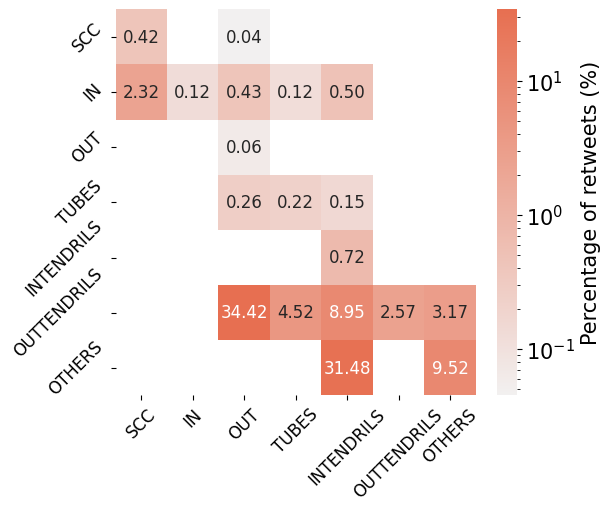

In [73]:
plot_weightPercent_matrix(fake_weightPercent_matrix2, color = colour_palette["fake"], save = "Figures/Fig4b2")

In [74]:
uncertain_bt_list2, uncertain_weightPercent_matrix2 = get_all_BTResults_ofCategorisedRetweets(G_filtered_sub2, edge_stance = 2)

Node numbers: 225245; Edge numbers: 480090; Weight numbers: 1712359.0
S  Number: 1190  Percentage: 0.53%
IN  Number: 46412  Percentage: 20.61%
OUT  Number: 2456  Percentage: 1.09%
TUBES  Number: 2112  Percentage: 0.94%
INTENDRILS  Number: 11920  Percentage: 5.29%
OUTTENDRILS  Number: 88898  Percentage: 39.47%
OTHERS  Number: 72257  Percentage: 32.08%
Weight count: 
[[ 20345      0  14751      0      0      0      0]
 [203217  42074 316152  13182 105792      0      0]
 [     0      0   8576      0      0      0      0]
 [     0      0  11741   5937   4640      0      0]
 [     0      0      0      0  60136      0      0]
 [     0      0 412757  14980  92225  11115  21609]
 [     0      0      0      0 205856      0 147274]]
Weight percentage: 
[[ 1.19  0.    0.86  0.    0.    0.    0.  ]
 [11.87  2.46 18.46  0.77  6.18  0.    0.  ]
 [ 0.    0.    0.5   0.    0.    0.    0.  ]
 [ 0.    0.    0.69  0.35  0.27  0.    0.  ]
 [ 0.    0.    0.    0.    3.51  0.    0.  ]
 [ 0.    0.   24.1   0

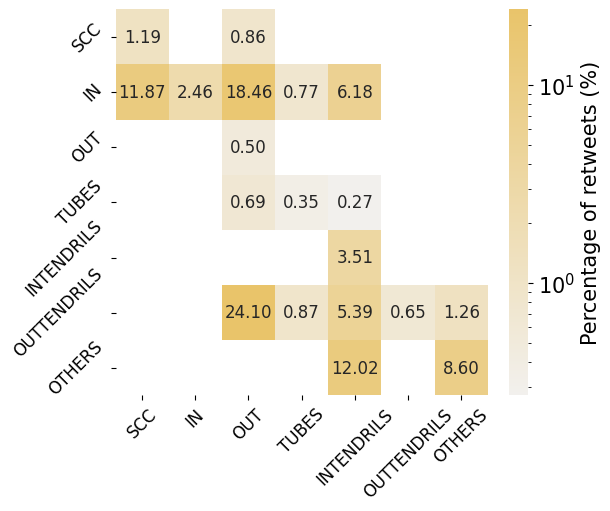

In [75]:
plot_weightPercent_matrix(uncertain_weightPercent_matrix2, color = colour_palette["uncertain"], save = "Figures/Fig4c2")

- Extreme Nodes

In [76]:
get_node_bowtie_role(scientific_bt_list2, scientificNodes_extreme, verbose = True);

S  Number: 9  Percentage: 1.08%
IN  Number: 584  Percentage: 1.75%
OUT  Number: 373  Percentage: 19.52%
TUBES  Number: 88  Percentage: 4.91%
INTENDRILS  Number: 806  Percentage: 8.90%
OUTTENDRILS  Number: 16604  Percentage: 23.11%
OTHERS  Number: 3599  Percentage: 6.96%


In [77]:
get_node_bowtie_role(fake_bt_list2, fakeNodes_extreme, verbose = True);

S  Number: 1  Percentage: 1.39%
IN  Number: 18  Percentage: 1.87%
OUT  Number: 4  Percentage: 5.26%
TUBES  Number: 1  Percentage: 0.45%
INTENDRILS  Number: 48  Percentage: 6.95%
OUTTENDRILS  Number: 4090  Percentage: 12.00%
OTHERS  Number: 8112  Percentage: 21.67%


In [78]:
get_node_bowtie_role(uncertain_bt_list2, uncertainNodes_extreme, verbose = True);

S  Number: 26  Percentage: 2.18%
IN  Number: 1740  Percentage: 3.75%
OUT  Number: 597  Percentage: 24.31%
TUBES  Number: 88  Percentage: 4.17%
INTENDRILS  Number: 3638  Percentage: 30.52%
OUTTENDRILS  Number: 19180  Percentage: 21.58%
OTHERS  Number: 33208  Percentage: 45.96%


### 2.2.3. Temporal Variations Plot

In [45]:
def bt_listToDict(bt_list):
    
    bt_values = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    d = {}
    for i in range(7):
        d.update(dict(zip(bt_list[i], [bt_values[i]]*len(bt_list[i]))))
    
    return d

In [46]:
def add_inactive_nodes(d, remaining_nodes_list):
    
    d.update(dict(zip(remaining_nodes_list, ['INACTIVE']*len(remaining_nodes_list))))

    return d

In [47]:
def results_convertToDF(bt_list1, bt_list2):
    
    bt_dict1 = bt_listToDict(bt_list1); bt_dict2 = bt_listToDict(bt_list2)
    
    bt_dict1 = add_inactive_nodes(bt_dict1, list(set(list(bt_dict2.keys())) - set(list(bt_dict1.keys()))))
    bt_dict2 = add_inactive_nodes(bt_dict2, list(set(list(bt_dict1.keys())) - set(list(bt_dict2.keys()))))
    
    cpd_dict = {}
    for k in list(bt_dict1.keys()):
        cpd_dict.update({k: [bt_dict1[k], bt_dict2[k]]})
        
    df = pd.DataFrame.from_dict(cpd_dict, orient='index')
    
    return df

In [48]:
def print_summary_info(df):
    
    persistent_active_count = np.sum(np.logical_and(df[0] != 'INACTIVE', df[1] != 'INACTIVE'))
    print("Persistently active nodes: ", (persistent_active_count, persistent_active_count/len(df)))
    
    consistent_count = np.sum(df[0] == df[1])
    print("Consistent BT roles among persistently active nodes: ", (consistent_count, consistent_count/persistent_active_count))
    

In [49]:
def filterInactive_df(df):
    
    return df[np.logical_and(df[0] != 'INACTIVE', df[1] != 'INACTIVE')]

In [50]:
def print_bt_percentage(df):
    
    bt_values_list = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']
    
    print("1st timestamp:")
    for i in range(7):
        count = np.sum(df[0] == (bt_values_list[i]))
        print(bt_values_list[i], end = "  ")
        print("Number:", count, end = "  ")
        print("Percentage: {:.2f}%".format(count/len(df) * 100))
    
    print("==========")
    print("2nd timestamp:")
    for i in range(7):
        count = np.sum(df[1] == bt_values_list[i])
        print(bt_values_list[i], end = "  ")
        print("Number:", count, end = "  ")
        print("Percentage: {:.2f}%".format(count/len(df) * 100))

- scientific

In [51]:
scientific_bt_df = results_convertToDF(scientific_bt_list1, scientific_bt_list2)

In [52]:
print_summary_info(scientific_bt_df)

Persistently active nodes:  (109187, 0.3024989610749411)
Consistent BT roles among persistently active nodes:  (62458, 0.5720278055079817)


In [53]:
active_scientific_bt_df = filterInactive_df(scientific_bt_df)

In [54]:
print_bt_percentage(active_scientific_bt_df)

1st timestamp:
SCC  Number: 1689  Percentage: 1.55%
IN  Number: 37588  Percentage: 34.43%
OUT  Number: 2965  Percentage: 2.72%
TUBES  Number: 2303  Percentage: 2.11%
INTENDRILS  Number: 5780  Percentage: 5.29%
OUTTENDRILS  Number: 47038  Percentage: 43.08%
OTHERS  Number: 11824  Percentage: 10.83%
2nd timestamp:
SCC  Number: 742  Percentage: 0.68%
IN  Number: 21828  Percentage: 19.99%
OUT  Number: 1631  Percentage: 1.49%
TUBES  Number: 1606  Percentage: 1.47%
INTENDRILS  Number: 6225  Percentage: 5.70%
OUTTENDRILS  Number: 52039  Percentage: 47.66%
OTHERS  Number: 25116  Percentage: 23.00%


In [55]:
from pysankey import sankey

 The following arguments are deprecated and should be removed: figureName in sankey()


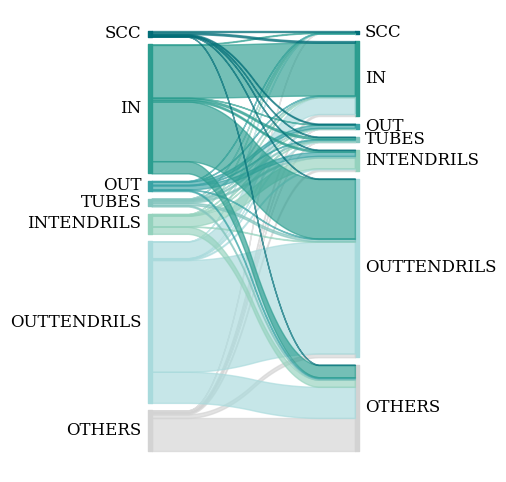

In [56]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#006d77",
    "IN":"#2a9d8f",
    "OUT": "#38a3a5", 
    "TUBES": "#83c5be",
    "INTENDRILS": "#94d2bd",
    "OUTTENDRILS": "#a8dadc",
    "OTHERS": "lightgrey",
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    active_scientific_bt_df[0], active_scientific_bt_df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/Fig5a'
)

- fake

In [57]:
fake_bt_df = results_convertToDF(fake_bt_list1, fake_bt_list2)

In [58]:
print_summary_info(fake_bt_df)

Persistently active nodes:  (29812, 0.20229629227512078)
Consistent BT roles among persistently active nodes:  (18848, 0.6322286327653294)


In [59]:
active_fake_bt_df = filterInactive_df(fake_bt_df)

In [60]:
print_bt_percentage(active_fake_bt_df)

1st timestamp:
SCC  Number: 60  Percentage: 0.20%
IN  Number: 2088  Percentage: 7.00%
OUT  Number: 273  Percentage: 0.92%
TUBES  Number: 367  Percentage: 1.23%
INTENDRILS  Number: 587  Percentage: 1.97%
OUTTENDRILS  Number: 18673  Percentage: 62.64%
OTHERS  Number: 7764  Percentage: 26.04%
2nd timestamp:
SCC  Number: 32  Percentage: 0.11%
IN  Number: 431  Percentage: 1.45%
OUT  Number: 39  Percentage: 0.13%
TUBES  Number: 172  Percentage: 0.58%
INTENDRILS  Number: 379  Percentage: 1.27%
OUTTENDRILS  Number: 14398  Percentage: 48.30%
OTHERS  Number: 14361  Percentage: 48.17%


 The following arguments are deprecated and should be removed: figureName in sankey()


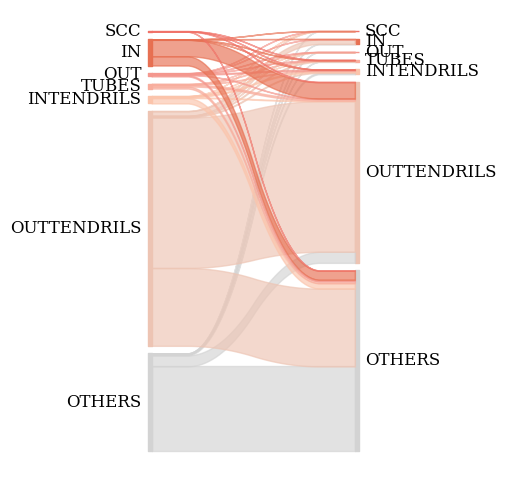

In [61]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#f07167",
    "IN": "#e76f51",
    "OUT": "#f4978e",
    "TUBES": "#f8ad9d",
    "INTENDRILS": "#fbc4ab",
    "OUTTENDRILS": "#edc4b3",
    "OTHERS": "lightgrey",
}

fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    active_fake_bt_df[0], active_fake_bt_df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/Fig5b'
)

- uncertain

In [62]:
uncertain_bt_df = results_convertToDF(uncertain_bt_list1, uncertain_bt_list2)

In [63]:
print_summary_info(uncertain_bt_df)

Persistently active nodes:  (142960, 0.29171164295931423)
Consistent BT roles among persistently active nodes:  (90356, 0.6320369334079463)


In [64]:
active_uncertain_bt_df = filterInactive_df(uncertain_bt_df)

In [65]:
print_bt_percentage(active_uncertain_bt_df)

1st timestamp:
SCC  Number: 1573  Percentage: 1.10%
IN  Number: 33354  Percentage: 23.33%
OUT  Number: 4044  Percentage: 2.83%
TUBES  Number: 2656  Percentage: 1.86%
INTENDRILS  Number: 8369  Percentage: 5.85%
OUTTENDRILS  Number: 63721  Percentage: 44.57%
OTHERS  Number: 29243  Percentage: 20.46%
2nd timestamp:
SCC  Number: 914  Percentage: 0.64%
IN  Number: 30414  Percentage: 21.27%
OUT  Number: 1905  Percentage: 1.33%
TUBES  Number: 1750  Percentage: 1.22%
INTENDRILS  Number: 8457  Percentage: 5.92%
OUTTENDRILS  Number: 54475  Percentage: 38.11%
OTHERS  Number: 45045  Percentage: 31.51%


 The following arguments are deprecated and should be removed: figureName in sankey()


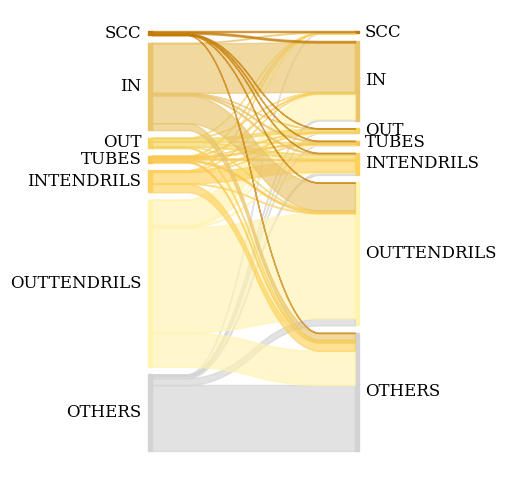

In [66]:
labels = ['SCC', 'IN', 'OUT', 'TUBES', 'INTENDRILS', 'OUTTENDRILS', 'OTHERS']; labels.reverse()

colors = {
    "SCC": "#C47900",
    "IN": "#e9c46a",
    "OUT": "#f4d35e",
    "TUBES": "#f9c74f",
    "INTENDRILS": "#FED15D",
    "OUTTENDRILS": "#fff3b0",
    "OTHERS": "lightgrey",
}

#colors = {
#    "SCC": "#763A12",
#    "IN": "#c78e3a",
#    "OUT": "#D49504",
#    "TUBES": "#e9c46a",
#    "INTENDRILS": "#f4d35e",
#    "OUTTENDRILS": "#FFE878",
#    "OTHERS": "lightgrey",
#}


fig, ax = plt.subplots(figsize=(3,6))
ax = sankey(
    active_uncertain_bt_df[0], active_uncertain_bt_df[1], aspect=20, colorDict=colors,
    leftLabels = labels,
    rightLabels = labels,
    fontsize = 12,
    figureName = 'Figures/Fig5c'
)